In [1]:
# 표준 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

# 한글 로딩
mpl.rc('font', family='Malgun Gothic')

# batter = pd.read_csv("D:/python3/data/batter_stats_2017.csv")
batter = pd.read_csv("C:/python3/data/batter_stats_2017.csv")
batter_df = pd.DataFrame(batter)

for i in range(len(batter_df)):
    if batter_df['BABIP'].values[i]=='-':
        batter_df['BABIP'].values[i] = 0
        
batter_df['BABIP'] = batter_df['BABIP'].astype(float, inplace = True)
bat_mean = batter_df.mean()                             # 전체 평균
bat_ss = batter_df[batter_df['팀명']=='삼성']           # 삼성만 추출
bat_ss_mean = bat_ss.mean()                             # 삼성 평균
bat_means = pd.concat((bat_mean, bat_ss_mean), axis=1)  # 전체+삼성 평균
bat_means = bat_means.T
# bat_means = round(bat_means, 2)

# 관련성 떨어지는것 or 겹치는 것 제거, OPS=출루율+장타율
bat_means.drop(['타석','타수','출루율','장타율','연봉(2018)'], axis=1, inplace=True)  
bat_means.index = ['전체평균', '삼성평균']              # 인덱스 변경
display(bat_means)

,경기,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,OPS,wOBA,WAR,연봉(2017)
전체평균,77.712042,62.256545,6.356021,33.277487,30.816754,19.335079,42.146597,3.670157,0.301461,0.249351,0.672325,0.293592,0.788743,19111.518325
삼성평균,77.526316,63.315789,6.105263,33.947368,30.473684,19.315789,42.105263,4.842105,0.282526,0.243368,0.678842,0.292579,0.621579,18494.736842


In [2]:
# BABIP ; Batted Average on Balls In Play 인플레이 (피)안타율
# OPS ;  On base Plus Slugging 출루율+장타율
# wOBA ; weight On-Base Average 가중출루율
# WAR ; Win Above Replacement 대체선수 대비 승리기여도
bat_means = bat_means.rename({'BABIP':'안타율','OPS':'출루,장타율',
                              'wOBA':'가중출루율' ,'WAR':'비교기여도'}, axis=1)

In [3]:
bat_means.columns

Index(['경기', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루', '안타율', '타율', '출루,장타율',
       '가중출루율', '비교기여도', '연봉(2017)'],
      dtype='object')

In [4]:
# from sklearn.model_selection import train_test_split
# from sklearn import linear_model  # 선형회귀분석용 머신러닝 알고리즘

# # 데이터는 대문자 X, 레이블은 소문자 y
# y = bat_means['연봉(2017)']
# # '연봉'을 뺀 나머지는 데이터다
# X = bat_means[bat_means.columns.difference(['연봉(2017)'])]

# # train:test = 9:1
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=19)

In [9]:
import statsmodels.api as sm

y = bat_means['연봉(2017)']
X = bat_means[bat_means.columns.difference(['연봉(2017)'])]

# X_train = sm.add_constant(X_train)
# model = sm.OLS(y_train, X_train).fit()  
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()  
model.summary()

C:\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2017)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 12 May 2021   Prob (F-statistic):                nan
Time:                        08:29:11   Log-Likelihood:                 45.399
No. Observations:                   2   AIC:                            -86.80
Df Residuals:                       0   BIC:                            -89.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4349        inf          0        nan         nan         nan
가중출루율          0.9599        inf          0        nan         nan         nan
경기           234.1628        inf          0        nan         nan         nan
도루          -274.6533        inf         -0        nan         nan         nan
득점           -81.0718        inf         -0        nan         nan         nan
볼넷            51.7464        inf          0        nan         nan         nan
비교기여도         42.3712        inf          0        nan         nan         nan
삼진           112.6244        inf          0        nan         nan         nan
안타          -104.7296        inf         -0        nan         nan         nan
안타율            5.3158        inf          0        nan         nan         nan
출루,장타율         0.0599        inf          0        nan         nan         nan
타율             2.0548        inf          0        nan         nan         nan
타점           158.0520        inf          0        nan         nan         nan
홈런            76.1550        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.094
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

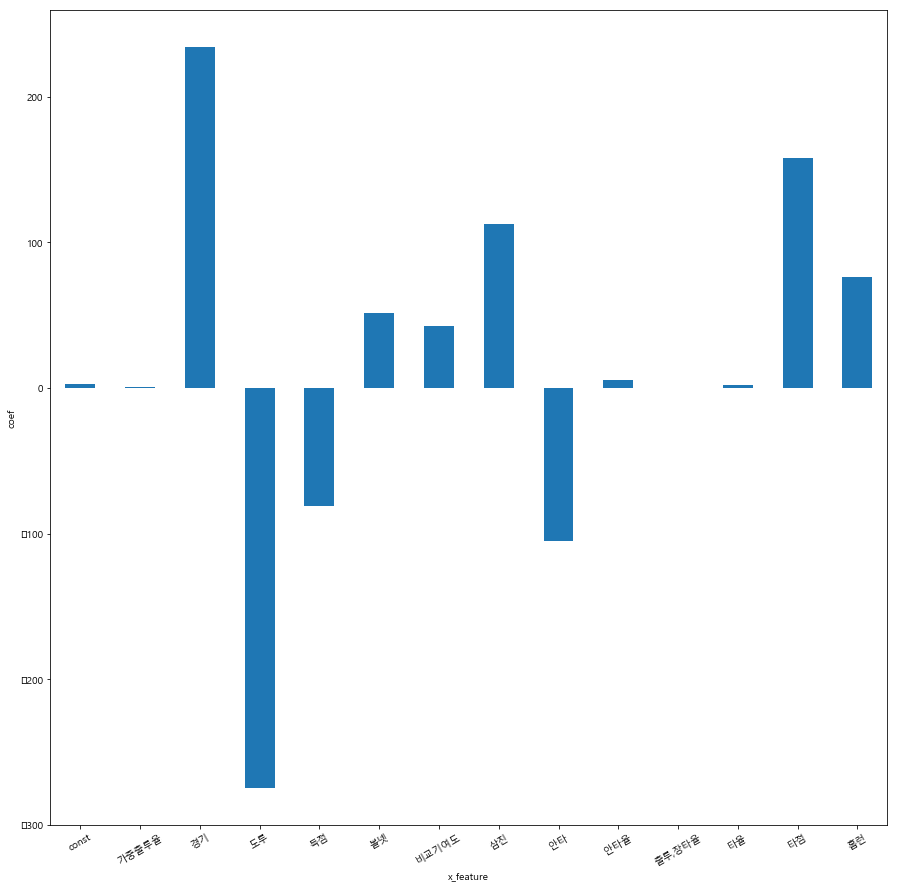

In [12]:
# 회귀계수를 이용해서 시각화
plt.rcParams['figure.figsize'] = [15,15]
coefs = model.params.tolist()      # params = parameters
coef_series = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coef_series.plot(kind = 'bar')
ax.set_ylabel('coef')
ax.set_xlabel('x_feature')
ax.set_xticklabels(x_labels, rotation=30)
plt.show()

In [13]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x - series_mean)/(series_std))
    return df

In [14]:
bat_df = standard_scaling(batter_df, bat_means.columns)
bat_df.head()

KeyError: '안타율'

In [ ]:
bat_df.drop(['타석', '타수', '출루율', '장타율', '연봉(2018)'], axis = 1, inplace = True)

In [ ]:
bat_df.drop(['가중출루율','경기','비교기여도','안타율'], axis=1, inplace=True)  
bat_means

In [ ]:
bat_df = round(bat_df, 2)
# bat_df.head(10)

In [ ]:
# print(bat_df[bat_df['팀명'] == '삼성'].mean())
# print(bat_df.groupby('팀명').sum().mean())

In [ ]:
n = len(bat_df.columns[2:])
x_pos = np.arange(n)
plt.rcParams['figure.figsize'] = [15,  10]

bat_df.groupby('팀명').sum().mean().plot(label = 'mean')
bat_df[bat_df['팀명'] == '삼성'].mean().plot(label = '삼성')
plt.xticks(x_pos, bat_df.columns[2:].tolist())
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
bat_df.groupby('팀명').sum().mean().index

In [ ]:
bat_df.groupby('팀명').sum().mean().index.tolist()

In [ ]:
len(bat_df[bat_df['팀명'] == '삼성'].mean().index)

In [ ]:
# bat_df[bat_df['팀명'] == '삼성'].mean()
# bat_df.groupby('팀명').sum().mean()

plt.figure(figsize = (15, 15))
plt.subplot(polar=True)

theta = np.linspace(0, 2*np.pi, len(bat_df.groupby('팀명').sum().mean().index))
ssv = bat_df[bat_df['팀명'] == '삼성'].mean().values.tolist()
mn = bat_df.groupby('팀명').sum().mean().values.tolist()

plt.plot(theta, ssv)
plt.fill(theta, ssv, 'b', alpha=0.2)
plt.plot(theta, mn)

(lines, labels) = plt.thetagrids(range(0, 360, int(360/len(ssv))), (bat_df.groupby('팀명').sum().mean().index))

plt.show()

In [ ]:
int(360/14)